# Dimensionality

Nr. Records =  286
First timestamp 2015-01-05 00:00:00
Last timestamp 2020-09-07 00:00:00


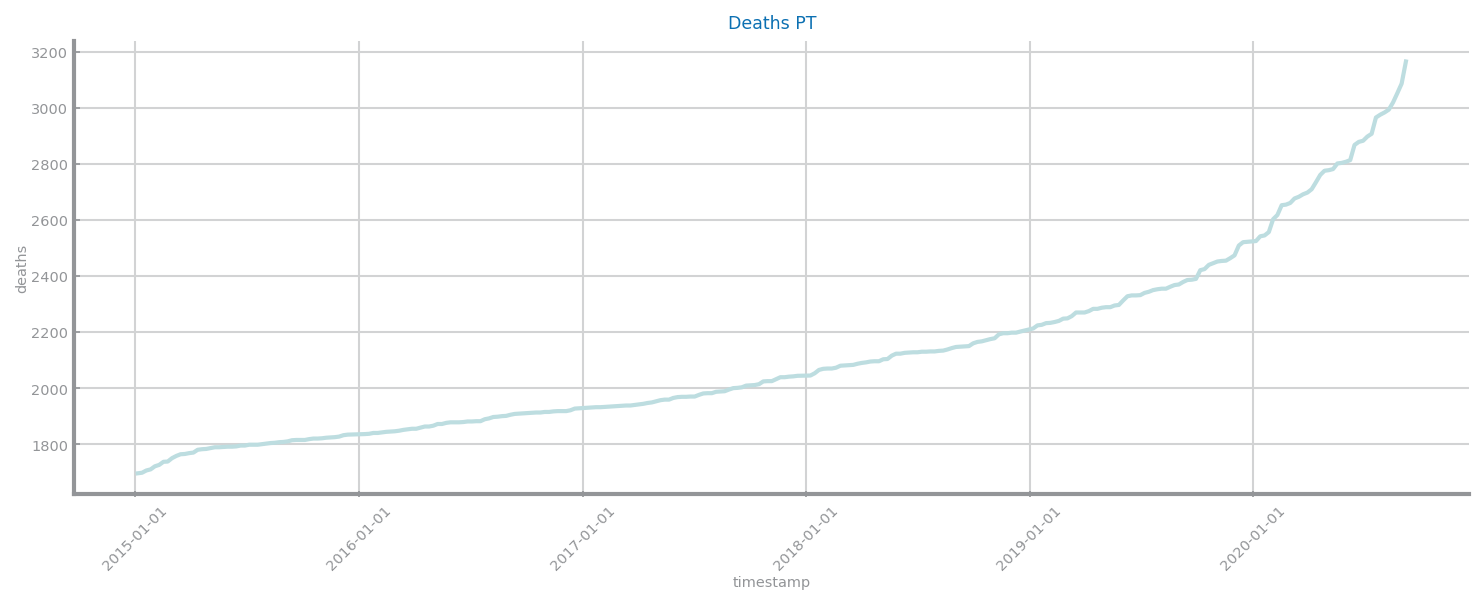

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts

data = pd.read_csv('deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)

print("Nr. Records = ", data.shape[0])
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data, x_label='timestamp', y_label='deaths', title='Deaths PT')
plt.xticks(rotation = 45)
plt.show()

# Granularity

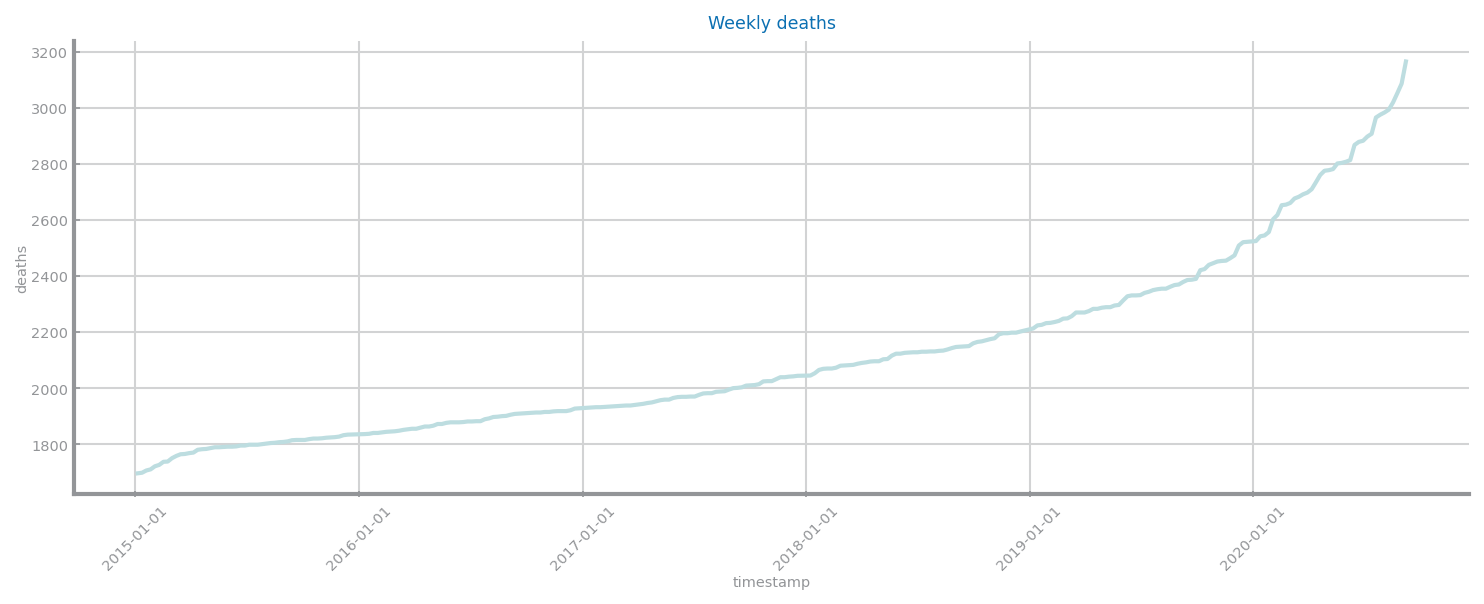

In [2]:
index = data.index.to_period('W')
week_df = data.copy().groupby(index).mean()
week_df['timestamp'] = index.drop_duplicates().to_timestamp()
week_df.set_index('timestamp', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(week_df, title='Weekly deaths', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

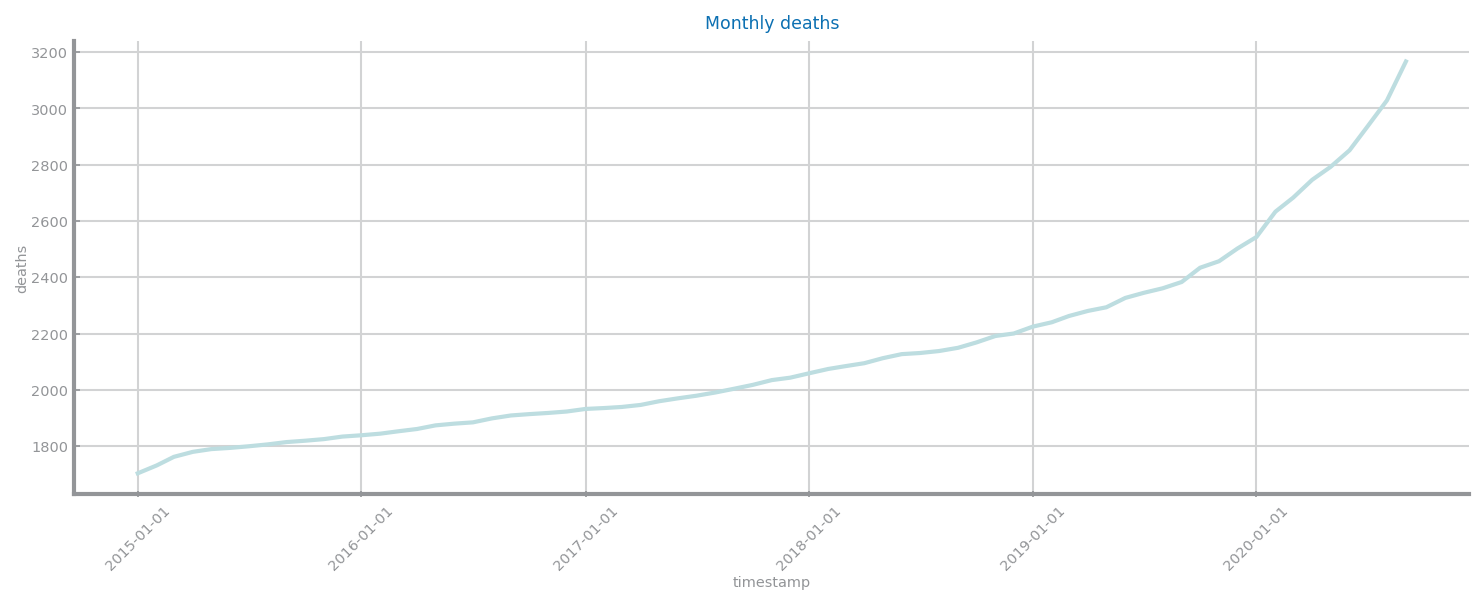

In [3]:
index = data.index.to_period('M')
week_df = data.copy().groupby(index).mean()
week_df['timestamp'] = index.drop_duplicates().to_timestamp()
week_df.set_index('timestamp', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(week_df, title='Monthly deaths', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

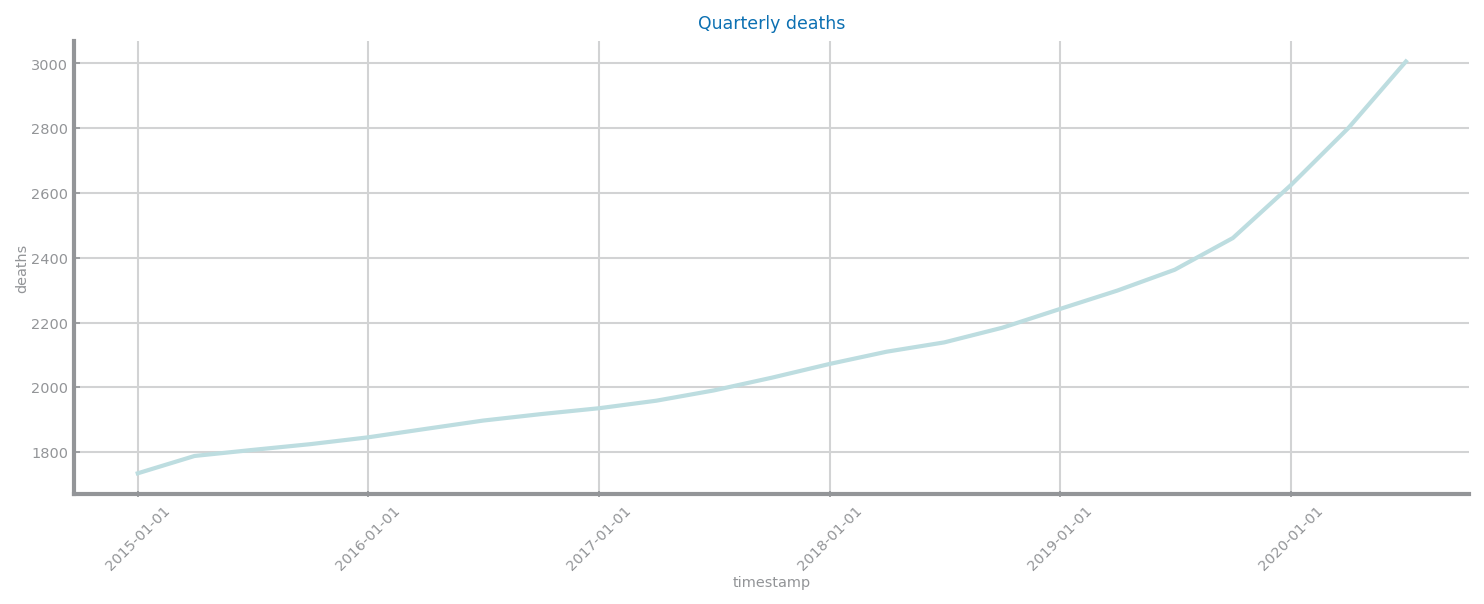

In [4]:
index = data.index.to_period('Q')
week_df = data.copy().groupby(index).mean()
week_df['timestamp'] = index.drop_duplicates().to_timestamp()
week_df.set_index('timestamp', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(week_df, title='Quarterly deaths', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

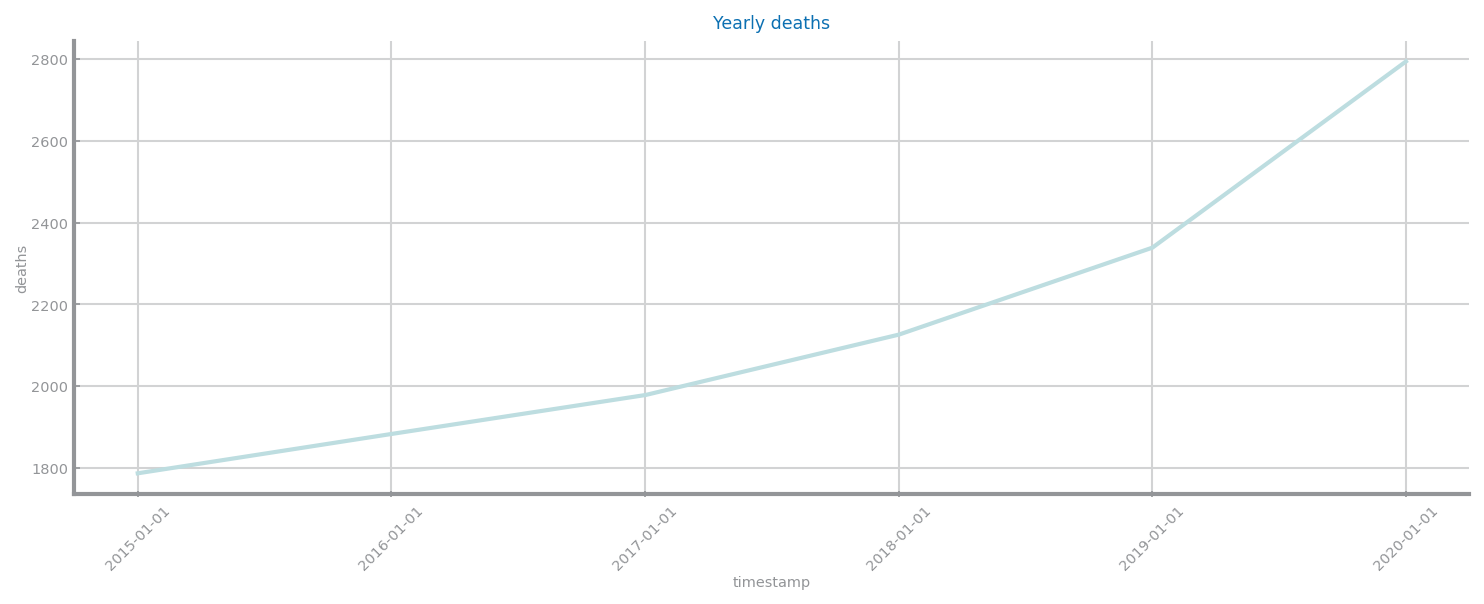

In [5]:
index = data.index.to_period('Y')
week_df = data.copy().groupby(index).mean()
week_df['timestamp'] = index.drop_duplicates().to_timestamp()
week_df.set_index('timestamp', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(week_df, title='Yearly deaths', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

# Distribution

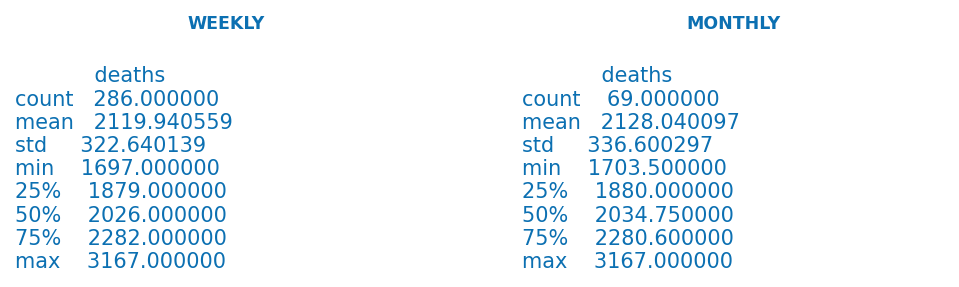

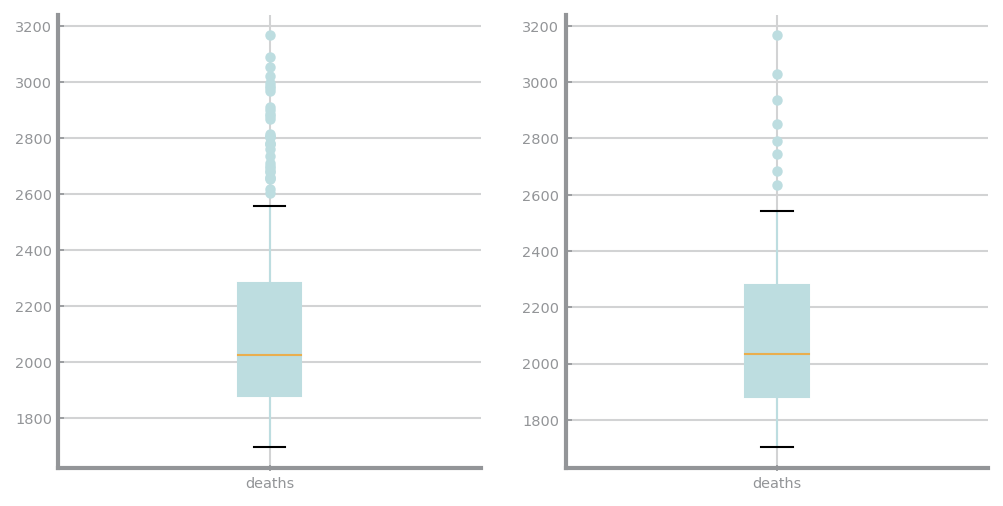

In [6]:
index = data.index.to_period('M')
monthly_df = data.copy().groupby(index).mean()
monthly_df['timestamp'] = index.drop_duplicates().to_timestamp()
monthly_df.set_index('timestamp', drop=True, inplace=True)
_, axs = plt.subplots(1, 2, figsize=(2*ts.HEIGHT, ts.HEIGHT/2))
axs[0].grid(False)
axs[0].set_axis_off()
axs[0].set_title('WEEKLY', fontweight="bold")
axs[0].text(0, 0, str(data.describe()))
axs[1].grid(False)
axs[1].set_axis_off()
axs[1].set_title('MONTHLY', fontweight="bold")
axs[1].text(0, 0, str(monthly_df.describe()))
plt.show()

_, axs = plt.subplots(1, 2, figsize=(2*ts.HEIGHT, ts.HEIGHT))
data.boxplot(ax=axs[0])
monthly_df.boxplot(ax=axs[1])
plt.show()

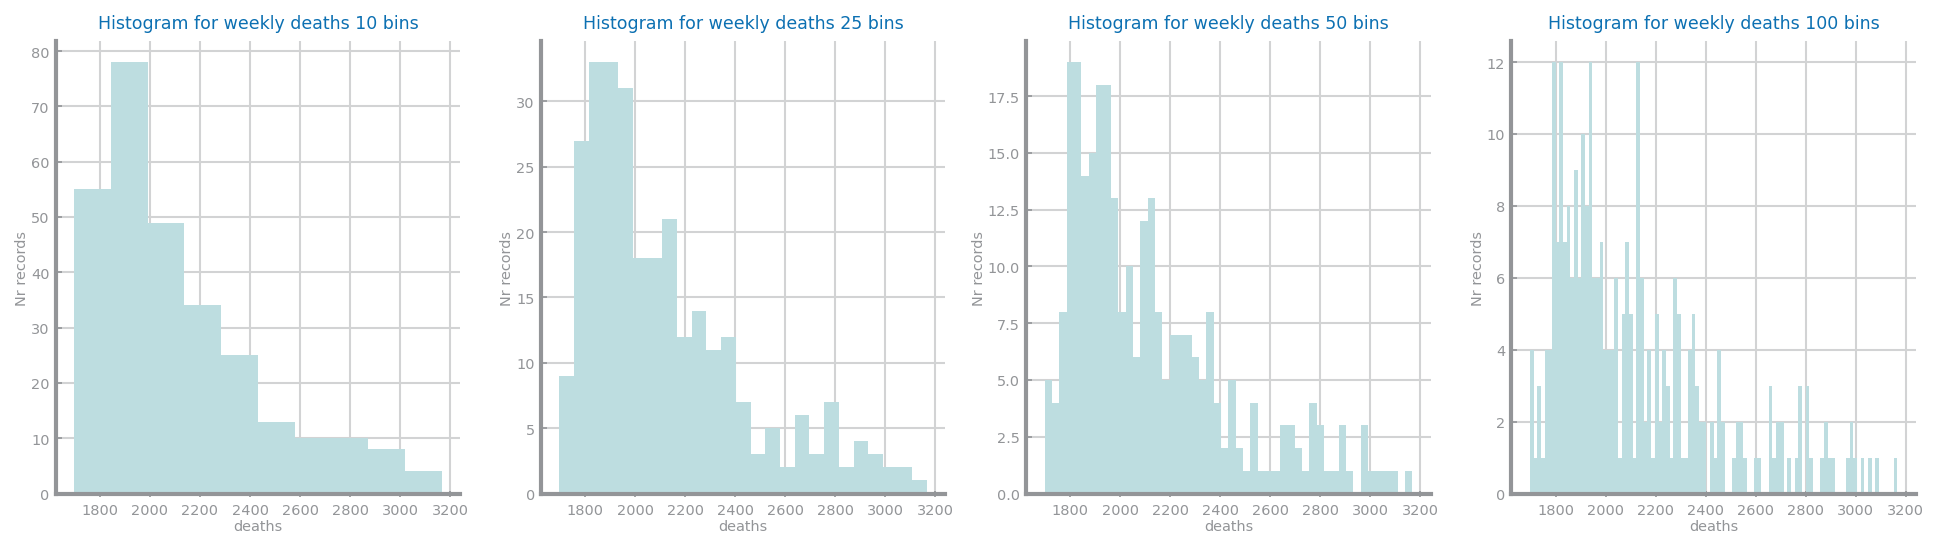

In [7]:
bins = (10, 25, 50, 100)
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for weekly deaths %d bins'%bins[j])
    axs[j].set_xlabel('deaths')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(data.values, bins=bins[j])
plt.show()

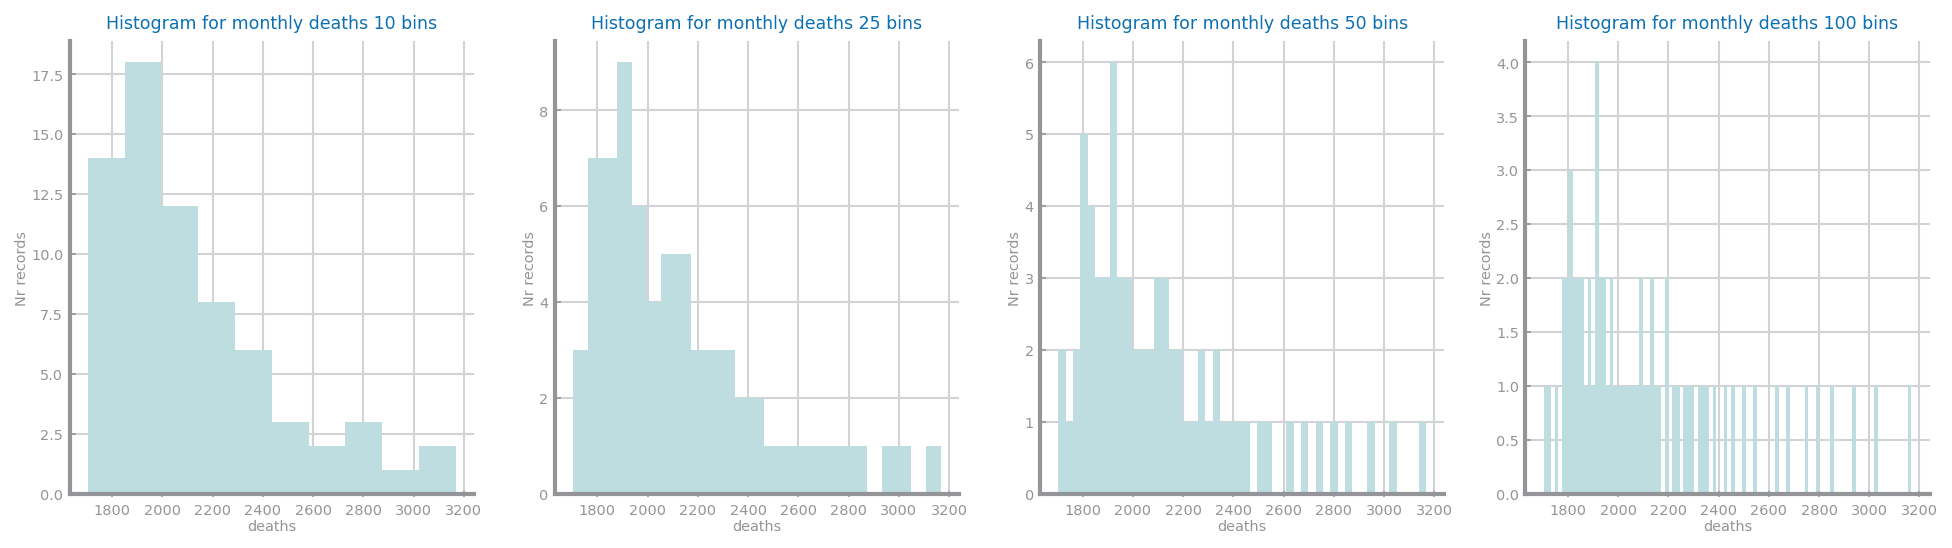

In [8]:
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for monthly deaths %d bins'%bins[j])
    axs[j].set_xlabel('deaths')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(monthly_df.values, bins=bins[j])
plt.show()

# Stationarity

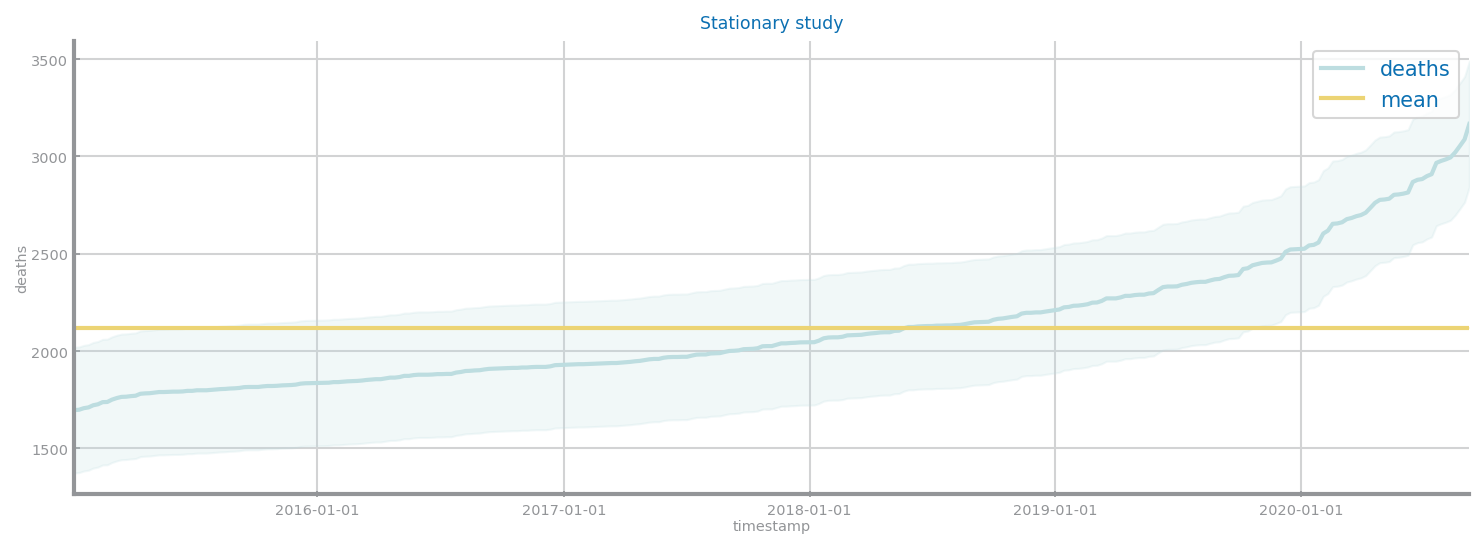

In [9]:
import numpy as np
dt_series = pd.Series(data['deaths'])

mean_line = pd.Series(np.ones(len(dt_series.values)) * dt_series.mean(), index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='timestamp', y_label='deaths', title='Stationary study', show_std=True)
plt.show()

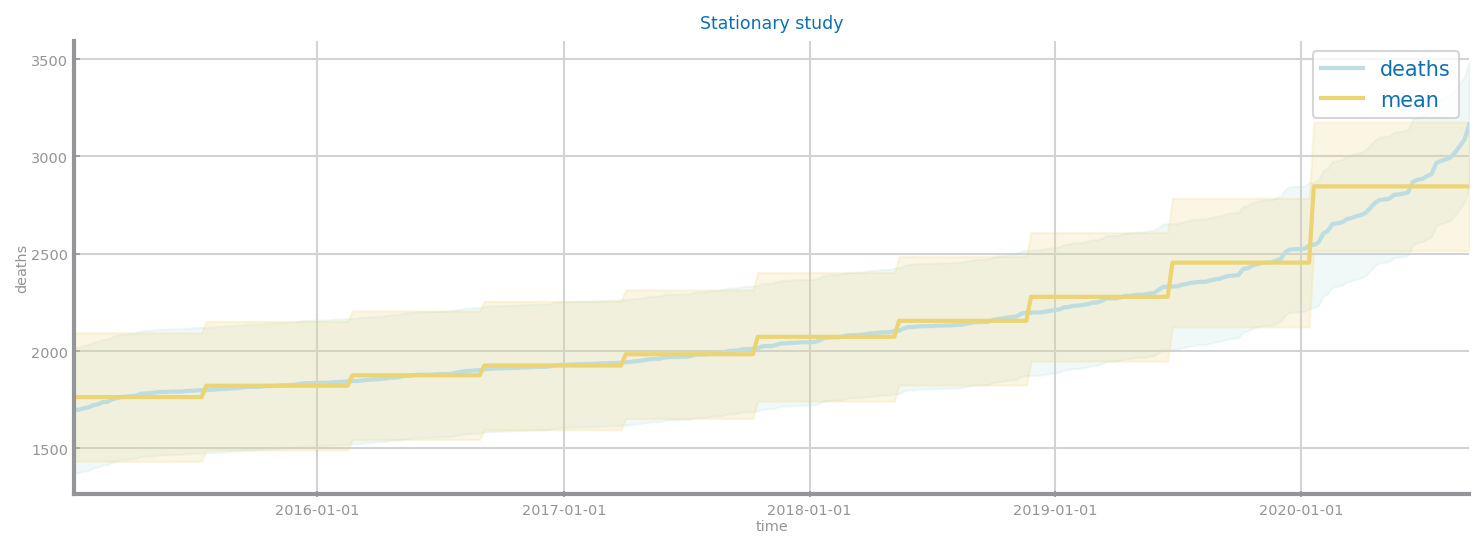

In [10]:
BINS = 10
line = []
n = len(dt_series)
for i in range(BINS):
    b = dt_series[i*n//BINS:(i+1)*n//BINS]
    mean = [b.mean()] * (n//BINS)
    line += mean
line += [line[-1]] * (n - len(line))
mean_line = pd.Series(line, index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='time', y_label='deaths', title='Stationary study', show_std=True)
plt.show()

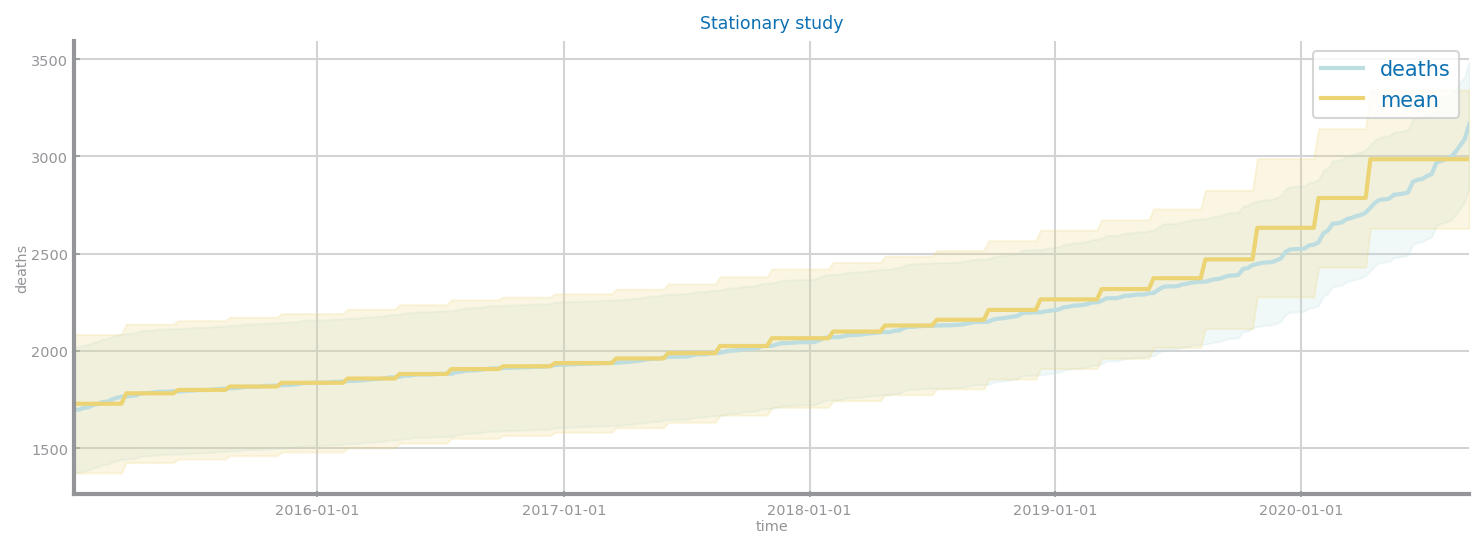

In [11]:
BINS = 25
line = []
n = len(dt_series)
for i in range(BINS):
    b = dt_series[i*n//BINS:(i+1)*n//BINS]
    mean = [b.mean()] * (n//BINS)
    line += mean
line += [line[-1]] * (n - len(line))
mean_line = pd.Series(line, index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='time', y_label='deaths', title='Stationary study', show_std=True)
plt.show()